In [2]:
import pandas as pd
import matplotlib
%matplotlib inline

In [3]:
df = pd.read_csv("cfs_2012_pumf_csv.txt")


### histogram of (log) value-to-weight ratios. 

#### It's $log_{10}$ so $.01 / lb is roughly the median value.

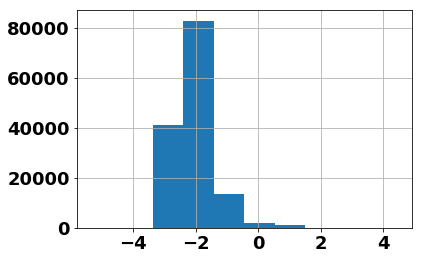

In [7]:
df['vtw'] = df['SHIPMT_VALUE'] / df['SHIPMT_WGHT']

filt = df[df.NAICS == 212]
import numpy as np
np.log10(filt.SHIPMT_VALUE / filt.SHIPMT_WGHT).hist()

### Summary statistics for (non-logged) value-to-weight ratios...

In [8]:
(filt.SHIPMT_VALUE / filt.SHIPMT_WGHT).describe()

count    140933.000000
mean          4.680617
std         292.262527
min           0.000005
25%           0.003728
50%           0.005521
75%           0.012500
max       26402.557971
dtype: float64

### the top 5 lowest value-to-weight ratios and their indices in the PUMfile

In [9]:
(filt.SHIPMT_VALUE / filt.SHIPMT_WGHT).sort_values().head()

1924424    0.000005
3667405    0.000027
2864077    0.000029
676482     0.000031
1876819    0.000149
dtype: float64

### The single lowets value-to-weight ratio

In [19]:
filt.loc[1924424]

SHIPMT_ID                 1924425
ORIG_STATE                     48
ORIG_MA                       238
ORIG_CFS_AREA              48-238
DEST_STATE                     48
DEST_MA                       238
DEST_CFS_AREA              48-238
NAICS                         212
QUARTER                         2
SCTG                           12
MODE                            4
SHIPMT_VALUE                    7
SHIPMT_WGHT               1464011
SHIPMT_DIST_GC                 18
SHIPMT_DIST_ROUTED             23
TEMP_CNTL_YN                    N
EXPORT_YN                       N
EXPORT_CNTRY                    N
HAZMAT                          N
WGT_FACTOR                    539
vtw                   4.78138e-06
Name: 1924424, dtype: object

### Median value to weight ratio by SCTG, with NAICS 212

In [12]:
filt.SCTG.value_counts()
filt.groupby("SCTG").vtw.median()

SCTG
00        0.032860
10        0.069454
10-14     0.008196
11        0.004902
12        0.004757
13        0.015357
14        0.316694
15        0.023524
15-19     0.032000
19        0.026314
20        0.076503
20-24     0.099141
22        0.264980
23        3.720000
31        0.031250
31-34     0.115681
32        3.347575
33        7.960526
34       14.005059
35       35.759425
36       11.308271
39-99     5.418353
40        0.005932
41        0.000512
43        1.606132
Name: vtw, dtype: float64

### (logged) value-to-weight within just SCTG 11, 12, 13 in NAICS 212

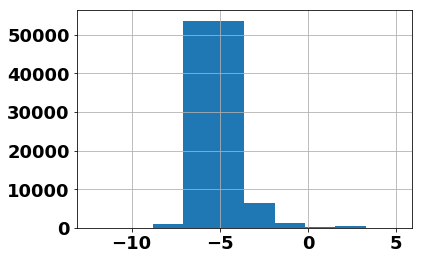

In [15]:
np.log(filt[filt.SCTG.isin({"11", "12", "13"})].vtw).hist()

### Descriptives for value-to-weight within SCTG 11,12, 13 in NAICS 212

In [17]:
filt[filt.SCTG.isin({"11", "12", "13"})].vtw.describe()

count    116380.000000
mean          0.048116
std           0.871427
min           0.000005
25%           0.003455
50%           0.004970
75%           0.007525
max         148.000000
Name: vtw, dtype: float64

### Min value-to-weight across the PUMfile

In [16]:
df.groupby("SCTG").vtw.min()

SCTG
00       0.004171
01       0.333341
01-05    0.001500
02       0.005001
03       0.000600
04       0.000983
05       0.029903
06       0.003114
06-09    0.064790
07       0.002963
08       0.002942
09       0.146429
10       0.001654
10-14    0.000027
11       0.000149
12       0.000005
13       0.000249
14       0.010015
15       0.002197
15-19    0.002499
17       0.013267
18       0.024849
19       0.000490
20       0.000098
20-24    0.006100
21       0.002714
22       0.000103
23       0.001301
24       0.000027
25       0.000991
25-30    0.001443
26       0.000745
27       0.001723
28       0.002334
29       0.000645
30       0.002401
31       0.000496
31-34    0.002996
32       0.000988
33       0.002807
34       0.004713
35       0.001124
35-38    0.020873
36       0.003576
37       0.007168
38       0.009022
39       0.034483
39-99    0.002501
40       0.003325
41       0.000053
43       0.003296
99       0.098970
Name: vtw, dtype: float64